# Question 1

# Data Importing

1.1 From the previous assignment, re-import the data from the csv file

In [78]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from arch import arch_model
import seaborn as sb
from scipy.spatial import distance_matrix
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import mixture
from scipy.stats import multivariate_normal
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.svm import SVC
from sklearn.svm import SVR


In [11]:
dframe = pd.read_csv('MScFE 650 MLF GWP Data.csv',index_col ="Date")
dframe.head()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
1-Jan-16,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,8566.71,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
8-Jan-16,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,8183.00,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
15-Jan-16,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,7755.73,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
22-Jan-16,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,8035.69,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
29-Jan-16,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,8211.17,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88


# Question 2

# Average Data Summaries

2.1 Calculate the mean of each series

In [12]:
dframe.mean()

LUXXX                      1457.231905
MSCI ARGENTINA             2526.652262
BLP ORIENTE MEDIO          3029.482978
MSCI AUSTRALIA             1183.940159
MSCI AUSTRIA                127.418889
MSCI BELGIUM                 91.290238
MSCI BRAZIL                1813.989167
MSCI CANADA                1970.821627
MSCI CHINA                   76.788214
MSCI DENMARK               8447.657738
MSCI EM ASIA                509.413056
MSCI EM EU-MIDE-AFRICA      247.079409
MSCI EM EUROPE              304.084643
MSCI EM LATIN AMERICA      2502.462738
MSCI FINLAND                121.925278
MSCI FRANCE                 145.765476
MSCI GERMANY                143.522897
MSCI HONG KONG            14216.931151
MSCI INDIA                 1187.467976
MSCI ITALY                   55.799127
MSCI JAPAN                  943.752143
MSCI KOREA                  647.381905
MSCI MEXICO                4875.085000
MSCI NETHERLANDS            141.988175
MSCI NEW ZEALAND            145.904444
MSCI NORWAY              

In [13]:
dframe.columns

Index(['LUXXX', 'MSCI ARGENTINA', 'BLP ORIENTE MEDIO', 'MSCI AUSTRALIA',
       'MSCI AUSTRIA', 'MSCI BELGIUM', 'MSCI BRAZIL', 'MSCI CANADA',
       'MSCI CHINA', 'MSCI DENMARK', 'MSCI EM ASIA', 'MSCI EM EU-MIDE-AFRICA',
       'MSCI EM EUROPE', 'MSCI EM LATIN AMERICA', 'MSCI FINLAND',
       'MSCI FRANCE', 'MSCI GERMANY', 'MSCI HONG KONG', 'MSCI INDIA',
       'MSCI ITALY', 'MSCI JAPAN', 'MSCI KOREA', 'MSCI MEXICO',
       'MSCI NETHERLANDS', 'MSCI NEW ZEALAND', 'MSCI NORWAY', 'MSCI PERU',
       'MSCI RUSSIA', 'MSCI SINGAPORE', 'MSCI SOUTH AFRICA', 'MSCI SPAIN',
       'MSCI SWEDEN', 'MSCI SWITZERLAND', 'MSCI UK', 'MSCI USA'],
      dtype='object')

2.2 Calculate the trimmed mean of each series, where trim=5% 

In [14]:
stats.trim_mean(dframe, 0.05, axis = 0)

array([ 1467.80062281,  2510.84807018,  3054.05824693,  1183.27605263,
         127.51929825,    92.04377193,  1829.17298246,  1977.83035088,
          76.86192982,  8378.56302632,   510.59675439,   247.29142982,
         304.36464912,  2519.50013158,   122.29482456,   145.74372807,
         143.89929825, 14251.03065789,  1190.83460526,    55.86135965,
         945.63451754,   648.34741228,  4908.4002193 ,   141.98302632,
         144.70925439,  2728.34780702,  1470.9120614 ,   594.61048246,
        1618.83886053,  1350.33850877,   107.11710526, 12385.66368421,
        1205.72469298,  2023.13149123,  2521.96662281])

2.3 Calculate the trimmed mean of each series, where trim=50%.  This is also called the median

In [15]:
dframe.median()

LUXXX                      1491.08100
MSCI ARGENTINA             2541.97500
BLP ORIENTE MEDIO          3113.41405
MSCI AUSTRALIA             1177.37500
MSCI AUSTRIA                130.63500
MSCI BELGIUM                 95.01500
MSCI BRAZIL                1860.96000
MSCI CANADA                1990.63000
MSCI CHINA                   78.71000
MSCI DENMARK               8227.80500
MSCI EM ASIA                517.31000
MSCI EM EU-MIDE-AFRICA      251.16550
MSCI EM EUROPE              306.43000
MSCI EM LATIN AMERICA      2598.95500
MSCI FINLAND                124.12000
MSCI FRANCE                 147.93000
MSCI GERMANY                144.64500
MSCI HONG KONG            14342.61000
MSCI INDIA                 1230.79000
MSCI ITALY                   55.96000
MSCI JAPAN                  953.66000
MSCI KOREA                  649.64000
MSCI MEXICO                4948.77000
MSCI NETHERLANDS            143.67500
MSCI NEW ZEALAND            135.85000
MSCI NORWAY                2795.26500
MSCI PERU   

2.4 Using subjective weights, apply 3 probabilities (that sum to 1) for each of the 3 averages

In [16]:
sub_weight1 = 0.3
sub_weight2 = 0.5
sub_weight3 = 0.2

weights_total = sub_weight1*dframe.mean() + sub_weight2*stats.trim_mean(dframe, 0.05, axis = 0) + sub_weight3*dframe.median()


weights_total

LUXXX                      1469.286083
MSCI ARGENTINA             2521.814714
BLP ORIENTE MEDIO          3058.556827
MSCI AUSTRALIA             1182.295074
MSCI AUSTRIA                128.112316
MSCI BELGIUM                 92.411957
MSCI BRAZIL                1830.975241
MSCI CANADA                1978.287664
MSCI CHINA                   77.209429
MSCI DENMARK               8369.139835
MSCI EM ASIA                511.584294
MSCI EM EU-MIDE-AFRICA      248.002638
MSCI EM EUROPE              304.693717
MSCI EM LATIN AMERICA      2530.279887
MSCI FINLAND                122.548996
MSCI FRANCE                 146.187507
MSCI GERMANY                143.935518
MSCI HONG KONG            14259.116674
MSCI INDIA                 1197.815695
MSCI ITALY                   55.862418
MSCI JAPAN                  946.674902
MSCI KOREA                  648.316278
MSCI MEXICO                4906.479610
MSCI NETHERLANDS            142.322966
MSCI NEW ZEALAND            143.295961
MSCI NORWAY              

2.5 Rank the series, from highest expected return to lowest expected return using your weighted factor

In [17]:
weights_total.sort_values(ascending = False)

MSCI HONG KONG            14259.116674
MSCI SWEDEN               12413.777556
MSCI DENMARK               8369.139835
MSCI MEXICO                4906.479610
BLP ORIENTE MEDIO          3058.556827
MSCI NORWAY                2739.406058
MSCI USA                   2530.733871
MSCI EM LATIN AMERICA      2530.279887
MSCI ARGENTINA             2521.814714
MSCI UK                    2031.861019
MSCI CANADA                1978.287664
MSCI BRAZIL                1830.975241
MSCI SINGAPORE             1628.141657
MSCI PERU                  1484.635376
LUXXX                      1469.286083
MSCI SOUTH AFRICA          1349.806695
MSCI SWITZERLAND           1204.249787
MSCI INDIA                 1197.815695
MSCI AUSTRALIA             1182.295074
MSCI JAPAN                  946.674902
MSCI KOREA                  648.316278
MSCI RUSSIA                 594.692563
MSCI EM ASIA                511.584294
MSCI EM EUROPE              304.693717
MSCI EM EU-MIDE-AFRICA      248.002638
MSCI FRANCE              

# Question 3

# Volatility Data Summaries

3.1 For the log return series, compute a EWMA

In [18]:

df = dframe.pct_change()
log_return = 100*np.log(1 + df)
log_return



,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
1-Jan-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8-Jan-16,-7.419482,-4.979960,-7.209283,-6.098257,-8.852910,-5.892390,-8.476887,-4.745693,-8.488880,-4.582493,...,-7.151468,-7.792559,-4.208598,-4.764154,-6.411867,-7.070757,-6.940440,-6.574385,-5.447059,-6.233275
15-Jan-16,-2.682756,-1.936041,-5.075978,-2.027253,-4.310291,-2.064445,-5.103846,-2.884514,-5.822498,-5.362691,...,-5.287202,-4.195488,-11.918526,-4.603323,-3.811007,-3.691051,-3.402890,-1.810204,-1.732104,-2.337298
22-Jan-16,-0.232474,2.866305,-6.055685,0.049715,2.376914,3.443915,-2.855879,2.626961,-0.759571,3.546094,...,3.652187,3.510137,6.461110,-1.684193,2.332945,1.902881,4.161703,1.919880,1.593215,1.363072
29-Jan-16,3.453789,7.600771,6.560643,1.977538,1.183077,2.277064,8.688151,3.523560,1.897811,2.160255,...,1.883645,10.092956,8.722681,1.838483,6.593890,0.853119,-0.350693,0.988153,3.136482,1.627155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-Sep-20,-6.258100,-3.948873,-3.001240,2.108677,-5.496518,-5.888471,-6.709618,-0.508459,-3.829903,-0.586746,...,-3.640849,-3.880182,-5.547188,-1.068704,-2.488458,-4.206023,-2.725454,-2.760948,-2.873321,-0.526540
2-Oct-20,4.825883,3.766475,0.595405,-3.356564,-0.070655,2.097604,-4.263623,0.648830,2.521492,2.374206,...,0.654166,0.838509,-2.086427,1.189310,2.990401,1.919009,1.798521,0.491423,1.007994,1.621944
9-Oct-20,3.640834,7.118124,-2.293840,5.082839,5.856447,4.951140,5.887399,2.179582,3.874968,3.370688,...,1.829868,3.344030,1.867986,1.105450,1.185501,3.041919,1.712181,0.518823,1.758721,3.831731


In [19]:
new_log =log_return.dropna()

In [20]:
EWMA = new_log.ewm(span=250, adjust=False).mean()
EWMA

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
8-Jan-16,-7.419482,-4.979960,-7.209283,-6.098257,-8.852910,-5.892390,-8.476887,-4.745693,-8.488880,-4.582493,...,-7.151468,-7.792559,-4.208598,-4.764154,-6.411867,-7.070757,-6.940440,-6.574385,-5.447059,-6.233275
15-Jan-16,-7.381739,-4.955706,-7.192284,-6.065818,-8.816714,-5.861888,-8.450010,-4.730863,-8.467634,-4.588710,...,-7.136613,-7.763897,-4.270032,-4.762873,-6.391143,-7.043827,-6.912253,-6.536424,-5.417458,-6.202232
22-Jan-16,-7.324772,-4.893379,-7.183228,-6.017089,-8.727522,-5.787738,-8.405435,-4.672235,-8.406215,-4.523891,...,-7.050647,-7.674064,-4.184525,-4.738341,-6.321629,-6.972539,-6.824014,-6.469043,-5.361596,-6.141950
29-Jan-16,-7.238888,-4.793824,-7.073715,-5.953387,-8.648553,-5.723477,-8.269231,-4.606930,-8.324111,-4.470630,...,-6.979457,-7.532495,-4.081678,-4.685936,-6.218716,-6.910183,-6.772434,-6.409623,-5.293882,-6.080045
5-Feb-16,-7.195830,-4.750233,-6.993209,-5.909635,-8.600630,-5.732432,-8.183953,-4.576161,-8.277123,-4.497666,...,-6.920384,-7.464653,-4.075276,-4.646394,-6.170954,-6.883245,-6.731784,-6.392272,-5.282612,-6.057579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-Sep-20,-1.275224,-0.971705,-1.187068,-0.858281,-1.506995,-1.060907,-1.306543,-0.629979,-1.007560,-0.439176,...,-1.034210,-1.199019,-0.626503,-0.805499,-0.941299,-1.206318,-0.863757,-0.835339,-0.896172,-0.686443
2-Oct-20,-1.226609,-0.933950,-1.172865,-0.878188,-1.495550,-1.035739,-1.330105,-0.619790,-0.979441,-0.416759,...,-1.020757,-1.182784,-0.638136,-0.789604,-0.909971,-1.181415,-0.842543,-0.824767,-0.881000,-0.668049
9-Oct-20,-1.187825,-0.869790,-1.181797,-0.830689,-1.436969,-0.988035,-1.272595,-0.597484,-0.940760,-0.386580,...,-0.998043,-1.146714,-0.618167,-0.774504,-0.893274,-1.147763,-0.822187,-0.814061,-0.859966,-0.632194


3.2 For the log series, run a GARCH(1,1) model

In [28]:
var_forcasts = []

var_forcasts = []
for i in [columns]:
  garch_1_1 = arch_model(log_return_clean[i], p = 1, q = 1,
                        mean = 'zero', vol = 'GARCH', dist = 'normal', rescale=False)
  # Fit the model
  garch_1_1_result = garch_1_1.fit(update_freq=5)
  forecast = garch_1_1_result.forecast(reindex=False)
  var_forcasts.append(forecast.variance['h.1'][0])

NameError: name 'columns' is not defined

In [29]:
volatility_summary = pd.DataFrame({"ewma": EWMA, "garch1_1": var_forcasts})
                               
volatility_summary

ValueError: Data must be 1-dimensional

3.3 For the price series, compute the 1-month range (high price minus low price over past 4 weeks)

In [30]:
monthly_range=dframe.rolling(4).max()-dframe.rolling(4).min()
monthly_range


,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
1-Jan-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8-Jan-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15-Jan-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22-Jan-16,136.549,158.79,590.8473,83.41,13.16,8.06,157.06,122.19,8.32,810.98,...,277.57,91.73,60.28,157.7601,122.03,11.06,1094.33,92.36,125.97,160.14
29-Jan-16,44.073,244.69,345.6006,20.18,4.12,5.73,79.80,97.76,3.48,455.44,...,119.28,104.95,56.48,87.6100,105.86,3.66,426.75,31.16,81.97,54.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-Sep-20,63.828,58.43,68.6200,24.35,6.93,3.92,148.06,22.47,4.62,489.82,...,95.31,92.74,31.63,21.8800,74.66,4.35,522.99,48.15,64.76,113.91
2-Oct-20,63.828,58.43,68.6200,38.52,6.97,3.92,162.53,22.47,3.70,463.23,...,95.31,48.02,43.08,15.8900,74.66,3.76,389.55,38.13,55.87,52.19
9-Oct-20,87.325,166.81,106.5500,58.84,5.12,4.72,158.32,57.91,6.26,657.66,...,95.31,49.66,43.08,30.8300,52.82,3.99,503.77,38.13,47.85,178.90


In [32]:
month_range_rank = monthly_range.mean(axis=0)
month_range_rank.head()

LUXXX                 73.464763
MSCI ARGENTINA       216.271285
BLP ORIENTE MEDIO    129.575322
MSCI AUSTRALIA        39.542570
MSCI AUSTRIA           6.687309
dtype: float64

In [33]:
volatility_summary["monthly_range_ranking"]=month_range_rank
volatility_summary

NameError: name 'volatility_summary' is not defined

3.4 Using subjective weights, apply 3 probabilities (that sum to 1) for each of the 3 vol measures

In [34]:
pr_ewma=0.35
pr_garch=0.25
pr_range=0.4

weighted_tot = volatility_summary.ewma*pr_ewma + volatility_summary.garch1_1*pr_garch + volatility_summary.month_range_summary*pr_range
weighted_tot

NameError: name 'volatility_summary' is not defined

3.5 Rank the series, from highest volatility to lowest volatility using your weighted factor.  For GARCH, use the unconditional variance as the average.  For EWMA and hi-minus-low, you may average the time series of volatilities to be able to get single-number summaries for each model.

In [35]:
weighted_tot.sort_values()

NameError: name 'weighted_tot' is not defined

# 4. Data Visualizing: Heat Maps

4.1 Write a Python function to compute a heat map of the correlations.
Be sure to show the scale using colors that range from blue for low values to red for high values.

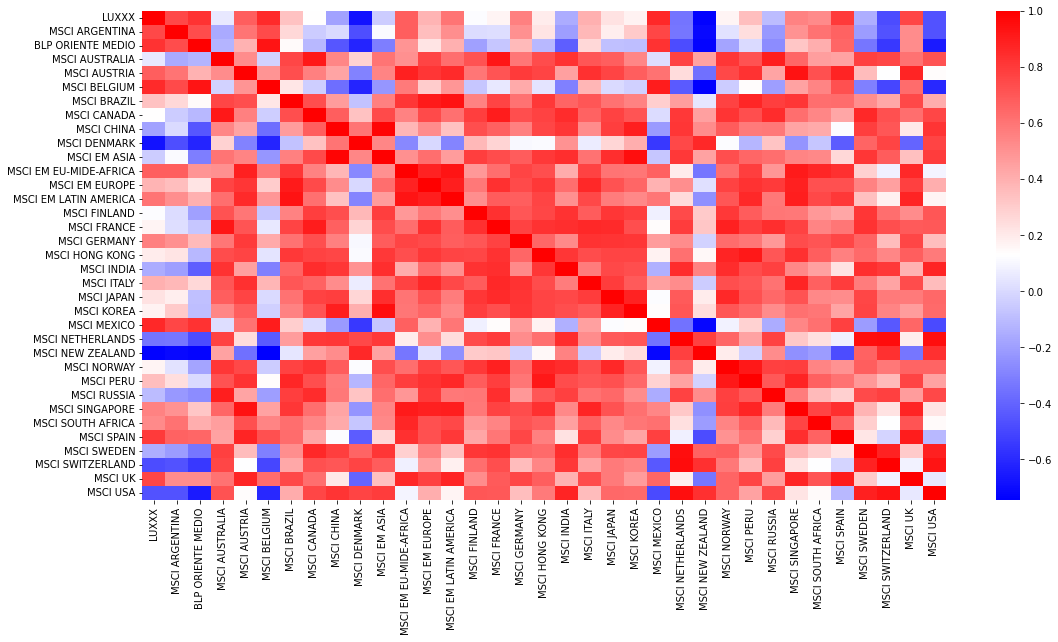

In [38]:
plt.figure(figsize=(18,9))
# plotting correlation heatmap
dataplot = sb.heatmap(dframe.corr(), cmap="bwr")
  
# displaying heatmap
plt.show()

# 5. Unsupervised Learning: Clustering

5.1 Calculate the Euclidean distance matrix for all 35 series

In [40]:
euclidian_mat = pd.DataFrame(euclidean_distances(dframe[columns],dframe[columns]).round(4),)
euclidian_mat

NameError: name 'columns' is not defined

5.2 Run a k-means cluster on the 35 return series

In [42]:
data_return = dframe.pct_change()*100
data_return_series = data_return.dropna()
data_return_series

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
8-Jan-16,-7.150921,-4.857993,-6.955548,-5.916036,-8.472352,-5.722148,-8.127539,-4.634846,-8.138557,-4.479082,...,-6.901739,-7.496675,-4.121266,-4.652449,-6.210631,-6.826568,-6.705068,-6.362932,-5.301364,-6.042981
15-Jan-16,-2.647090,-1.917420,-4.949303,-2.006842,-4.218718,-2.043281,-4.975788,-2.843309,-5.656233,-5.221435,...,-5.149861,-4.108695,-11.235666,-4.498978,-3.739302,-3.623762,-3.345643,-1.793918,-1.717189,-2.310195
22-Jan-16,-0.232204,2.907779,-5.875974,0.049727,2.405388,3.503905,-2.815485,2.661770,-0.756694,3.609718,...,3.719698,3.572470,6.674408,-1.670090,2.360371,1.921101,4.249516,1.938429,1.605975,1.372404
29-Jan-16,3.514125,7.897089,6.780637,1.997221,1.190103,2.303187,9.076743,3.586373,1.915934,2.183758,...,1.901498,10.619872,9.114413,1.855487,6.816145,0.856768,-0.350079,0.993051,3.186188,1.640465
5-Feb-16,-1.818462,0.679070,3.076095,-0.461434,-2.599814,-6.618147,2.463059,-0.742598,-2.397852,-7.562381,...,0.435238,0.986451,-3.225002,0.277071,-0.224270,-3.467919,-1.657046,-4.143786,-3.805230,-3.207909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-Sep-20,-6.066303,-3.871921,-2.956650,2.131067,-5.348189,-5.718454,-6.489474,-0.507169,-3.757490,-0.585028,...,-3.575367,-3.805868,-5.396138,-1.063014,-2.457751,-4.118797,-2.688649,-2.723182,-2.832434,-0.525156
2-Oct-20,4.944225,3.838306,0.597181,-3.300856,-0.070630,2.119759,-4.174008,0.650940,2.553551,2.402615,...,0.656310,0.842035,-2.064812,1.196410,3.035563,1.937540,1.814792,0.492633,1.013092,1.635168
9-Oct-20,3.707924,7.377582,-2.267732,5.214232,6.031335,5.075758,6.064158,2.203508,3.951024,3.428139,...,1.846713,3.400571,1.885542,1.111582,1.192556,3.088658,1.726923,0.520171,1.774277,3.906089


5.3 Justify your choice of k

In [43]:
# Format data

data = data_return_series
data = np.array(data, dtype = float)


n_clusters = 4
km = KMeans(n_clusters)
km.fit(data)
labels = km.labels_
clus_centers = km.cluster_centers_
clus_centers.shape

(4, 35)

In [49]:
clus_centers

array([[-2.64129847e+00, -3.85423425e+00, -1.38385312e+00,
        -1.23403894e+00, -3.35407238e+00, -2.69461851e+00,
        -3.26457185e+00, -1.59128907e+00, -2.61872608e+00,
        -1.57713406e+00, -2.17620414e+00, -2.59657871e+00,
        -2.83715951e+00, -3.03968965e+00, -2.33769469e+00,
        -2.66955766e+00, -2.71166838e+00, -2.09048366e+00,
        -1.47514191e+00, -2.76061660e+00, -2.40372902e+00,
        -1.83597691e+00, -2.64559728e+00, -2.27531922e+00,
        -4.70233475e-01, -2.04709327e+00, -1.90568703e+00,
        -2.90633726e+00, -1.80645272e+00, -1.83552198e+00,
        -2.99248386e+00, -2.32587587e+00, -1.87729823e+00,
        -2.03963598e+00, -1.80068123e+00],
       [ 7.26189452e-02,  2.93557100e-01,  9.47718379e-03,
         2.27744028e-01,  2.13666389e-01,  5.67496343e-02,
         1.88298896e-01,  3.64230789e-01,  3.82116104e-01,
         3.64210687e-01,  2.82033605e-01,  1.14610222e-01,
         2.78249187e-01,  8.25394520e-02,  1.69647823e-01,
         2.83

5.4 Normalize each data series. Subtract each series by the weighted average from part 2.4.  Then divide this difference by the weighted volatility from part 3.4

In [44]:
normalized_data = (dframe - weights_total)/weighted_tot
normalized_data

NameError: name 'weighted_tot' is not defined

5.5 Using the normalized data series, re-calculate the Euclidean distance matrix for all 35 series

In [45]:
euclidian_mat2 = pd.DataFrame(euclidean_distances(normalized_data,normalized_data).round(4),)
euclidian_mat2

NameError: name 'normalized_data' is not defined

5.6 Using the normalized data series, run a k-means cluster on the 35 transformed variables

In [46]:
data = normalized_data
data = np.array(data, dtype = float)

# Your code here
n_clusters = 4
km = KMeans(n_clusters)
km.fit(data)
labels = km.labels_
clus_centers = km.cluster_centers_
clus_centers.shape

NameError: name 'normalized_data' is not defined

In [ ]:
clus_centers

5.7 Justify your choice of k

# 6. Data Selection

6.1 Choose one of the 35 variables to serve as your response variable (e.g. LUXXX).  You may choose the same one that your group used in the previous assignment.

In [53]:
dframe = pd.read_csv('MScFE 650 MLF GWP Data.csv',parse_dates=['Date'])


y=dframe.LUXXX
y.head()

0    1390.716
1    1291.267
2    1257.086
3    1254.167
4    1298.240
Name: LUXXX, dtype: float64

In [54]:
y_return=np.log(y).diff()
y_return.head()

0         NaN
1   -0.074195
2   -0.026828
3   -0.002325
4    0.034538
Name: LUXXX, dtype: float64

In [55]:
X=dframe.copy()
X.drop(columns=['Date', 'LUXXX'], inplace=True)
X.shape


(252, 34)

In [56]:
X_return=np.log(X).diff()
X_return.head()

,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.049800,-0.072093,-0.060983,-0.088529,-0.058924,-0.084769,-0.047457,-0.084889,-0.045825,-0.066605,...,-0.071515,-0.077926,-0.042086,-0.047642,-0.064119,-0.070708,-0.069404,-0.065744,-0.054471,-0.062333
2,-0.019360,-0.050760,-0.020273,-0.043103,-0.020644,-0.051038,-0.028845,-0.058225,-0.053627,-0.039069,...,-0.052872,-0.041955,-0.119185,-0.046033,-0.038110,-0.036911,-0.034029,-0.018102,-0.017321,-0.023373
3,0.028663,-0.060557,0.000497,0.023769,0.034439,-0.028559,0.026270,-0.007596,0.035461,-0.000220,...,0.036522,0.035101,0.064611,-0.016842,0.023329,0.019029,0.041617,0.019199,0.015932,0.013631
4,0.076008,0.065606,0.019775,0.011831,0.022771,0.086882,0.035236,0.018978,0.021603,0.029765,...,0.018836,0.100930,0.087227,0.018385,0.065939,0.008531,-0.003507,0.009882,0.031365,0.016272


# 7. Compare unsupervised and supervised

7.1 What is the difference between unsupervised learning and supervised learning?

A supervised learning algorithm learns from labeled training data and aids in the prediction of unexpected data outputs. Unsupervised learning is a machine learning technique in which the model does not require supervision. Instead, you should let the model figure out what it needs to know on its own. It is mostly concerned with unlabeled data.

7.2 Which is clustering?  Which is CART?  Which is SVM? 



Clustering is unsupervised learning.

CART is supervised learning.

SVM is supervised learning.


# 8. Compare and Contrast CART and SVM

8.1 What do the CART and SVM have in common?  Be specific as to how they cut the dimensional space

A Classification And Regression Tree (CART) is a predictive model that shows how the values of an outcome variable can be predicted based on the values of other variables. A CART output is a decision tree in which each fork represents a split in a predictor variable and each end node represents an outcome variable prediction.
The support vector machine (SVM) is a data-classification technique for predictive analysis that allocates incoming data items to one of several designated groups.

They're both data-classification algorithms for predictive analysis that allocate fresh data items to one of the identified groups. They both tackle non-linear problems, have high accuracy, and can forecast events quickly.

8.2 How do the CART and SVM methodologies differ?

CART approaches don't necessitate a lot of data preparation. CART does not require feature scaling or data centering. In the case of SVM, feature scaling is extremely important, and feature normalization is essential for a successful fit. CART is less susceptible to outliers, but SVM seeks the widest margin, which means it is influenced by data points in the margin, which could be outliers.

# 9. Classification and Regression Trees (CART)

9.1 Perform a Classification Tree, where the response is categorical: whether your return was higher or lower than the previous week.  (Ties can be ignored).  Choose a suitable depth of the tree, basing your result on cross-validation

In [58]:
# categorical response, 0 = low or tie and 1 = higher return than previous week
y_return_cat=(y_return>0) * 1
y_return_cat.head()

0    0
1    0
2    0
3    0
4    1
Name: LUXXX, dtype: int64

In [59]:

# we use data time t-1, to model the effect of features on the response variable at time t, 
# 1 year worth of data was used for each prediction for training data

window_size = 52 # number of weeks in a year

CART_classifier_model_accuracy=[]
max_depth=np.arange(2,10)

for depth in max_depth:
    y_return_cat_pred=[]
    correct_pred=[]

    for i in np.arange(window_size, len(y_return_cat)-1):

        # train using 52 weeks of data before the week on which the prediction is done
        
        # Prepare training data
        X_train=X_return[i-window_size+1:i+1]
        y_train=y_return_cat[i-window_size+1:i+1]

        # Fit the model
        CART_classifier_model = DecisionTreeClassifier(max_depth=depth, random_state=0)
        CART_classifier_model.fit(X_train, y_train)

        # Predict 
        X_i=X_return.loc[i+1].to_numpy().reshape(1, -1)
        y_return_cat_pred.append(CART_classifier_model.predict(X_i))
        correct_pred.append((CART_classifier_model.predict(X_i)==y_return_cat[i+1])*1)

    # accuracy for each max_depth is saved
    CART_classifier_model_accuracy.append(sum(correct_pred)/len(correct_pred)) 



In [60]:
CART_classifier_model_accuracy

[array([0.63819095]),
 array([0.61809045]),
 array([0.61809045]),
 array([0.6080402]),
 array([0.6080402]),
 array([0.6080402]),
 array([0.61306533]),
 array([0.61306533])]

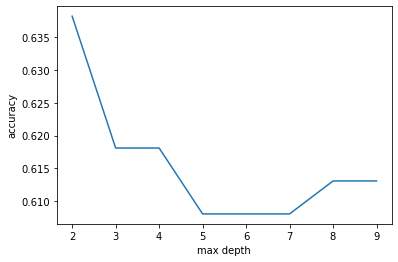

In [62]:
# plot accuracy vs depth
plt.plot(max_depth,CART_classifier_model_accuracy)
plt.xlabel("max depth")
plt.ylabel("accuracy");

In [63]:
window_size = 52 # number of weeks in a year

depth=2
y_return_cat_pred=[]
correct_pred=[]

for i in np.arange(window_size, len(y_return_cat)-1):
    
    # Prepare training data
    X_train=X_return[i-window_size+1:i+1]
    y_train=y_return_cat[i-window_size+1:i+1]
    
    # Fit the model
    CART_classifier_model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf = CART_classifier_model.fit(X_train, y_train)
    
    # Predict    
    X_i=X_return.loc[i+1].to_numpy().reshape(1, -1)
    y_return_cat_pred.append(CART_classifier_model.predict(X_i))
    correct_pred.append((CART_classifier_model.predict(X_i)==y_return_cat[i+1])*1)
    
CART_classifier_model_accuracy=sum(correct_pred)/len(correct_pred)
CART_classifier_model_accuracy


array([0.63819095])

In [64]:
window_size = 52 # number of weeks in a year

depth=2

max_depth=np.arange(2,10)


y_return_pred=[]
squared_error_pred=[]

for i in np.arange(window_size, len(y_return)-1):

    # train using 52 weeks of data before the week on which the prediction is done

    # Prepare training data
    X_train=X_return[i-window_size+1:i+1]
    y_train=y_return[i-window_size+1:i+1]

    # Fit the model
    CART_regressor_model = DecisionTreeRegressor(max_depth=depth, random_state=0)
    CART_regressor_model.fit(X_train, y_train)

    # Predict   
    y_return_pred.append(CART_regressor_model.predict(X_return.loc[[i+1],:]))

    # Error
    squared_error_pred.append(np.square(CART_regressor_model.predict(X_return.loc[[i+1],:])-y_return[i+1]))

    # accuracy for each max_depth is saved
    CART_regressor_model_RMSE_best=np.sqrt(np.mean(squared_error_pred)) 

In [65]:
CART_regressor_model_RMSE_best

0.02877015235171696

9.3 Which performed better, the classification or the regression tree?

# 10. Support Vector Machines (SVM)

10.1 Instead of running a regression tree, use SVM.  Use the original space of 35 variables

In [68]:
# we use data time t-1, to model the effect of features on the response variable at time t, 
# 1 year worth of data was used for each prediction for training data

window_size = 52 # number of weeks in a year

linearSVM_classifier_model_accuracy=[]
max_depth=np.arange(2,10)

y_return_cat_pred=[]
correct_pred=[]

for i in np.arange(window_size, len(y_return_cat)-1):

    # train using 52 weeks of data before the week on which the prediction is done

    # Prepare training data
    X_train=X_return[i-window_size+1:i+1]
    y_train=y_return_cat[i-window_size+1:i+1]

    # Fit the model


    linearSVM_classifier_model = Pipeline([("scaler", StandardScaler()),("linear_svc", LinearSVC(C=0.01, loss="hinge")),])
    linearSVM_classifier_model.fit(X_train, y_train)

    # Predict 
    X_i=X_return.loc[[i+1],:]
    y_return_cat_pred.append(linearSVM_classifier_model.predict(X_i))
    correct_pred.append((linearSVM_classifier_model.predict(X_i)==y_return_cat[i+1])*1)

# accuracy for each max_depth is saved
linearSVM_classifier_model_accuracy=(sum(correct_pred)/len(correct_pred)) 


In [69]:
linearSVM_classifier_model_accuracy

array([0.68844221])

In [ ]:
Running SVR

In [72]:
# we use data time t-1, to model the effect of features on the response variable at time t, 
# 1 year worth of data was used for each prediction for training data

# Running SVR

window_size = 52 # number of weeks in a year

y_return_pred=[]
squared_error_pred=[]

for i in np.arange(window_size, len(y_return)-1):

    # train using 52 weeks of data before the week on which the prediction is done

    # Prepare training data
    X_train=X_return[i-window_size+1:i+1]
    y_train=y_return[i-window_size+1:i+1]

    # Fit the model

    linearSVR_classifier_model = Pipeline([("scaler", StandardScaler()),("linearsvr", LinearSVR(epsilon=1.5)),])
    linearSVR_classifier_model.fit(X_train, y_train)

    # Predict 
    X_i=X_return.loc[[i+1],:]
    y_return_pred.append(linearSVR_classifier_model.predict(X_i))

    # Error
    squared_error_pred.append(np.square(linearSVR_classifier_model.predict(X_return.loc[[i+1],:])-y_return[i+1]))

# accuracy for each max_depth is saved
linearSVR_classifier_model_RMSE_best=np.sqrt(np.mean(squared_error_pred))

In [73]:
linearSVR_classifier_model_RMSE_best

0.03472349932845658

10.2 Choose a kernel.  Rerun the SVM

In [76]:
#  SVM with kernel

window_size = 52 # number of weeks in a year

poly_kernel_SVM_classifier_model_accuracy=[]
max_depth=np.arange(2,10)

y_return_cat_pred=[]
correct_pred=[]

for i in np.arange(window_size, len(y_return_cat)-1):

    # train using 52 weeks of data before the week on which the prediction is done

    # Prepare training data
    X_train=X_return[i-window_size+1:i+1]
    y_train=y_return_cat[i-window_size+1:i+1]

    # Fit the model
    poly_kernel_SVM_classifier_model = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=100)),])
    poly_kernel_SVM_classifier_model.fit(X_train, y_train)
    
    # Predict 
    X_i=X_return.loc[[i+1],:]
    y_return_cat_pred.append(poly_kernel_SVM_classifier_model.predict(X_i))
    correct_pred.append((poly_kernel_SVM_classifier_model.predict(X_i)==y_return_cat[i+1])*1)

# accuracy for each max_depth is saved
poly_kernel_SVM_classifier_model_accuracy=(sum(correct_pred)/len(correct_pred)) 
poly_kernel_SVM_classifier_model_accuracy


array([0.54271357])

In [79]:
# SVR with kernel

window_size = 52 # number of weeks in a year

y_return_pred=[]
squared_error_pred=[]

for i in np.arange(window_size, len(y_return)-1):

    # train using 52 weeks of data before the week on which the prediction is done

    # Prepare training data
    X_train=X_return[i-window_size+1:i+1]
    y_train=y_return[i-window_size+1:i+1]

   
    # Fit the model
    kernelSVR_classifier_model = Pipeline([("scaler", StandardScaler()),("linearsvr", SVR(kernel="poly", degree=3, C=10, epsilon=0.1))])
    kernelSVR_classifier_model.fit(X_train, y_train)

    # Predict 
    X_i=X_return.loc[[i+1],:]
    y_return_pred.append(kernelSVR_classifier_model.predict(X_i))

    # Error
    squared_error_pred.append(np.square(kernelSVR_classifier_model.predict(X_return.loc[[i+1],:])-y_return[i+1]))

# accuracy for each max_depth is saved
kernelSVR_classifier_model_RMSE=np.sqrt(np.mean(squared_error_pred)) 
kernelSVR_classifier_model_RMSE

0.03415868312745159

10.3 Compare the results of the 2 SVMs.  Comment on how well the data is linearly separable.